<a href="https://colab.research.google.com/github/yashasvimisra2798/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow-gpu==2.0

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.0.0


**Data Preprocessing**

In [5]:
# loading the dataset from keras
data = keras.datasets.fashion_mnist

In [6]:
# dividing the data into two parts for traing and testing 
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [7]:
# There are ten labels in total 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

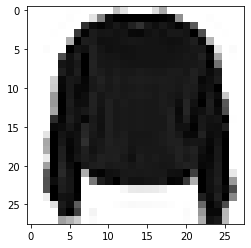

In [8]:
# Show an image
plt.imshow(train_images[7], cmap=plt.cm.binary)
# using plt.cm.binary for better visualisation
plt.show()

In [9]:
# leat's see how the data actually looks like
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

Hence the above data is whole list of pixels we just saw that

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

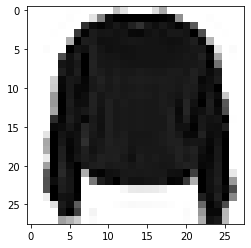

In [10]:
# let's shrink the data and then try the previous operations
train_images = train_images/255.0
test_images = test_images/255.0

print(train_images[7])
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

 **Creating a Model**

In [11]:
import tensorflow.python.keras.engine.base_layer

In [15]:
from tensorflow.python.keras.layers import Layer, InputSpec
from tensorflow.keras.layers import Layer, InputSpec

In [16]:
# Flatten the input layers and make a fully connected layer
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(128, activation="relu"),
                          tf.keras.layers.Dense(10,activation="softmax")
                          ])

# adding parameters for optimization and loss function
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# training the model
model.fit(train_images, train_labels, epochs=10)

# evalutaing the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

# print the accuracy
print("Tested Accucracy: ",test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5020 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3783 - accuracy: 0.8633
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3372 - accuracy: 0.8755
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3133 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2951 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2825 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2691 - accuracy: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2550 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2481 - accuracy: 0.9076
Epoch 10/10
60

**Using the Model to Make Predictions**

In [17]:
prediction = model.predict(test_images)
print(prediction)

[[7.7704510e-07 1.0042820e-08 3.6237186e-08 ... 5.7032112e-02
  2.3156230e-07 9.4282967e-01]
 [4.3969644e-06 1.6603774e-14 9.9902439e-01 ... 5.4887112e-13
  5.1050177e-09 1.2513282e-15]
 [2.8251581e-08 9.9999988e-01 3.0342809e-10 ... 8.0973337e-20
  2.6973877e-13 6.1571050e-17]
 ...
 [4.7508680e-04 8.0916235e-10 3.2397224e-05 ... 7.8918966e-08
  9.9908948e-01 1.5878591e-10]
 [9.4366266e-07 9.9972242e-01 5.5396586e-06 ... 4.8536062e-12
  2.0823217e-07 6.9390995e-09]
 [3.0630010e-05 1.3983314e-08 3.4871282e-05 ... 2.9380673e-03
  1.8396453e-03 5.8094197e-06]]


In [18]:
print(prediction[0])

[7.7704510e-07 1.0042820e-08 3.6237186e-08 1.4196596e-07 1.5396979e-07
 1.3547798e-04 1.3822345e-06 5.7032112e-02 2.3156230e-07 9.4282967e-01]


In [19]:
# give the index of the neuron with the largest value
print(np.argmax(prediction[0]))

9


In [20]:
# getting the name of the class
print(class_names[np.argmax(prediction[0])])

Ankle boot


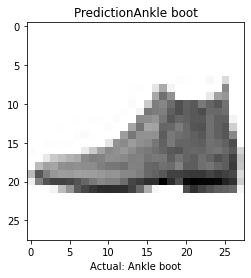

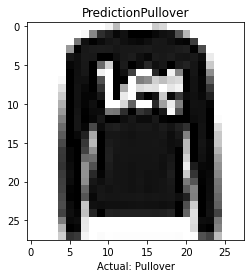

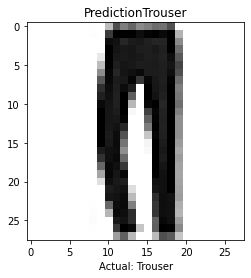

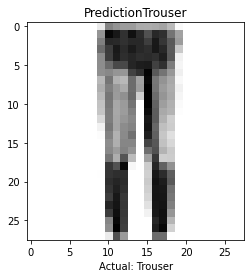

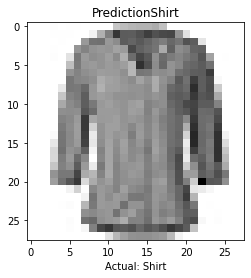

In [21]:
# showing the inputs and then getting the outputs

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: "+ class_names[test_labels[i]])
    plt.title("Prediction" + class_names[np.argmax(prediction[i])])
    plt.show()